#                              Yelp review dataset analysis

In [460]:
## Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [461]:
## Modules for Data PreProcessing and text visualization
import nltk
from collections import Counter
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
import string
from textblob import TextBlob
from itertools import islice
from wordcloud import STOPWORDS
from wordcloud import WordCloud

In [462]:
## Importing necessary modelues for Model Building
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [463]:
file='/Users/ankit/Downloads/yelp_dataset/yelp_review_short.csv'

In [464]:
df= pd.read_csv(file)

In [465]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [466]:
df.describe()

,stars,useful,funny,cool
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,3.716700,1.29820,0.458000,0.559000
std,1.471549,2.90264,1.557973,2.056682
min,1.000000,0.00000,0.000000,0.000000
25%,3.000000,0.00000,0.000000,0.000000
50%,4.000000,0.00000,0.000000,0.000000
75%,5.000000,1.00000,0.000000,0.000000
max,5.000000,91.00000,42.000000,86.000000


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
review_id      10000 non-null object
user_id        10000 non-null object
business_id    10000 non-null object
stars          10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
cool           10000 non-null int64
text           10000 non-null object
date           10000 non-null object
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [468]:
df.dropna(inplace=True)

In [469]:
df.count()

review_id      10000
user_id        10000
business_id    10000
stars          10000
useful         10000
funny          10000
cool           10000
text           10000
date           10000
dtype: int64

In [470]:
df['length'] = df['text'].apply(len)


In [471]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509


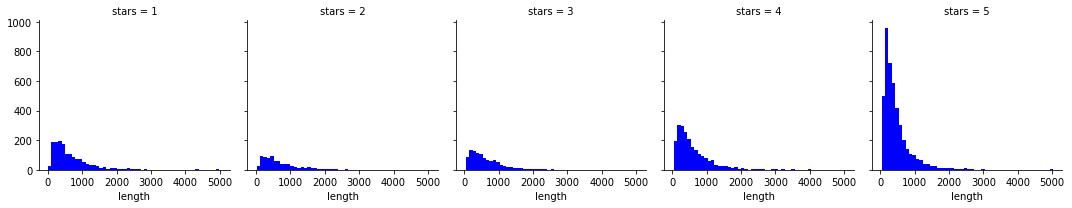

In [472]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

We can see the length of reviews was more for 5 stars.

In [473]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = df.groupby('stars').mean()
stval

,useful,funny,cool,length
stars,,,,
1,1.901897,0.576848,0.243950,711.079137
2,1.518750,0.655000,0.426250,730.323750
3,1.292523,0.514019,0.609346,681.386916
4,1.332568,0.562701,0.847037,623.055122
5,1.034132,0.316230,0.537975,470.524638


In [474]:
stval.corr()


,useful,funny,cool,length
useful,1.000000,0.711053,-0.657042,0.777206
funny,0.711053,1.000000,-0.166384,0.932967
cool,-0.657042,-0.166384,1.000000,-0.354818
length,0.777206,0.932967,-0.354818,1.000000


Thus, we can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length  
Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.
Whereas, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.

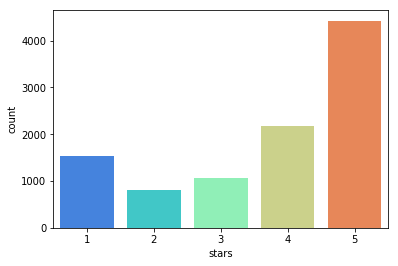

In [475]:
sns.countplot(x='stars',data=df,palette = 'rainbow')


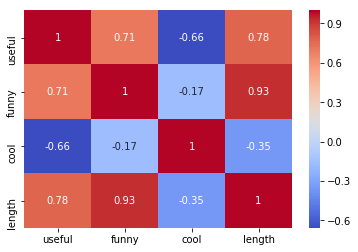

In [476]:
sns.heatmap(stval.corr(),cmap='coolwarm',annot=True)


Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.



In [477]:
yelp_class=df[(df['stars']==1)|(df['stars']==5)]
yelp_class.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509


Set the index with review_id

In [478]:
yelp_class.set_index('review_id')

,user_id,business_id,stars,useful,funny,cool,text,date,length
review_id,,,,,,,,,
Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509
8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1,3,1,1,This place has gone down hill. Clearly they h...,2010-10-05 19:12:35,380
-I5umRTkhw15RqpKMl_o1Q,-mA3-1mN4JIEkqOtdbNXCQ,mRUVMJkUGxrByzMQ2MuOpA,1,0,1,0,"Walked in around 4 on a Friday afternoon, we s...",2017-12-15 23:27:08,434
JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1,1,1,0,I cannot believe how things have changed in 3 ...,2012-07-16 00:37:14,968
svK3nBU7Rk8VfGorlrN52A,NJlxGtouq06hhC7sS2ECYw,YvrylyuWgbP90RgMqZQVnQ,5,0,0,0,You can't really find anything wrong with this...,2017-04-07 21:27:49,405


In [479]:
business=df.business_id.unique()

In [480]:
business.shape

(4618,)

So their are total of 4618 bussiness reviewed in the above dataset.

## Sentiment Analysis consists of two parts; Subjectivity and Polarity. Simply, Polarity and Subjectivity can be explained as follows:
Polarity — It simply means emotions expressed in a sentence, across a range of negative, to positive.
Subjectivity — Subjective sentence expresses some personal feelings, views, or beliefs.

In [481]:
COLS = ['date','text', 'sentiment','subjectivity','polarity']
df_new = pd.DataFrame(columns=COLS)


In [482]:
for index, row in islice(df.iterrows(), 0, None):

    new_entry = []
    text_lower=(row['text'].lower())
    blob = TextBlob(text_lower)
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    new_entry += [row['date'],text_lower,sentiment,subjectivity,polarity]
    single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
    df_new = df_new.append(single_survey_sentimet_df, ignore_index=True)
df_new.to_csv('Yelp_Text_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")


In [483]:
df_new.shape

(10000, 5)

In [484]:
df_new.head()

,date,text,sentiment,subjectivity,polarity
0,2013-05-07 04:34:36,total bill for this horrible service? over $8g...,"(-0.3333333333333333, 0.6166666666666667)",0.616667,-0.333333
1,2017-01-14 21:30:33,i *adore* travis at the hard rock's new kelly ...,"(0.3158096408096408, 0.5366678366678367)",0.536668,0.315810
2,2016-11-09 20:09:03,i have to say that this office really has it t...,"(0.429125, 0.5840000000000001)",0.584000,0.429125
3,2018-01-09 20:56:38,went in for a lunch. steak sandwich was delici...,"(0.8324999999999999, 0.885)",0.885000,0.832500
4,2018-01-30 23:07:38,today was my second out of three sessions i ha...,"(0.04927662037037037, 0.43240740740740735)",0.432407,0.049277


In [485]:
df_new.describe()

,subjectivity,polarity
count,10000.000000,10000.000000
mean,0.556653,0.237336
std,0.136217,0.231866
min,0.000000,-1.000000
25%,0.479207,0.100106
50%,0.555021,0.238889
75%,0.635556,0.377350
max,1.000000,1.000000


So my program has confirmed to me that all the 10000 records are there and gave me a mean polarity of 0.24, which is good that means as an average, most people are in between neutral to positive with the services.
And as you can see the 50% Value which means the median is above zero i.e., 0.24. 

Text(0, 0.5, 'Range')

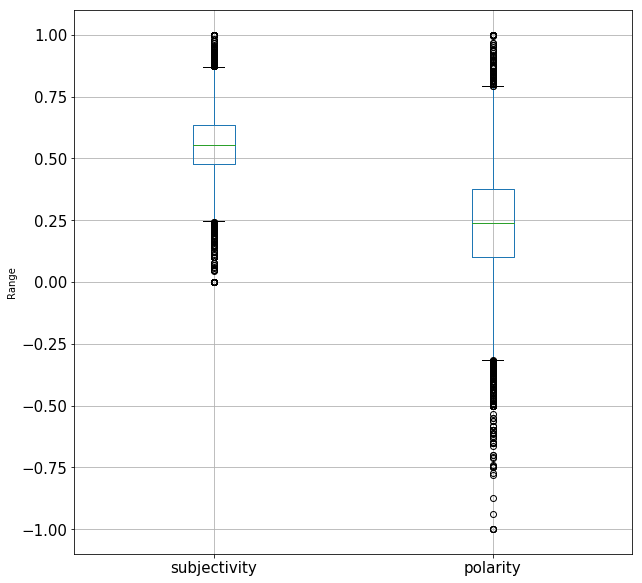

In [486]:
#boxplot for df_new

boxplot = df_new.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range')

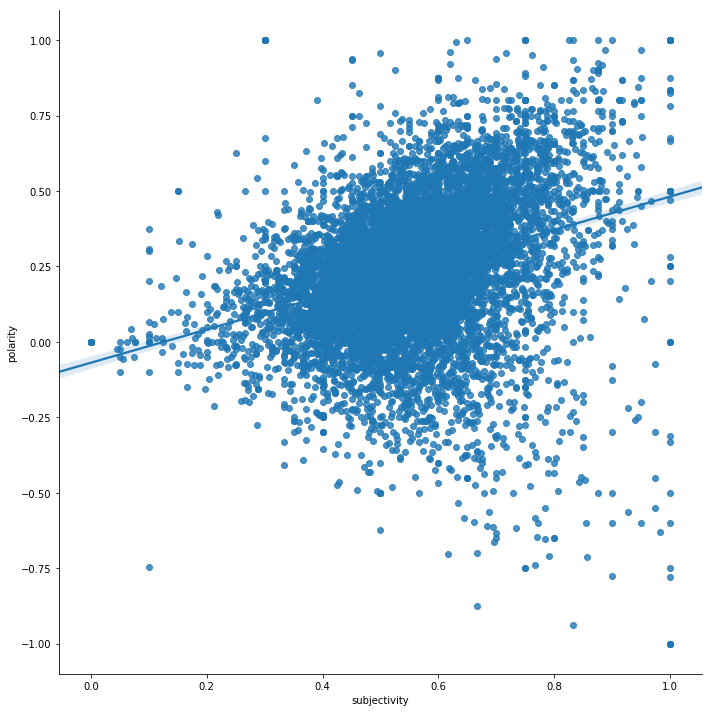

In [487]:
#scatter for dffilter

sns.lmplot(x='subjectivity',y='polarity',data=df_new,fit_reg=True,scatter=True, height=10,palette="mute") 


The scatter diagram is used to find the covariance and correlation between two variables. This diagram helps you determine how closely the two variables are related. After determining the correlation between the variables, you can then predict the behavior of the dependent variable based on the measure of the independent variable.

In [488]:
#covariance and correlation for df_new
# calculate the covariance between two variables

from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

# prepare data
data1 = df_new['subjectivity']
data2 = data1 + df_new['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.018555   0.02876936]
 [0.02876936 0.09274557]]
Pearsons correlation: 0.69351


The covariance between the two variables is 0.0287693. We can see that it is positive, suggesting the variables change in the same direction as we expect.

We can see that the two variables are positively correlated and that the correlation is 0.69351. This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.

### The plot shows a positive correlation between Subjectivity and Polarity.
Meaning, as subjectivity increase, the polarity in the response increase too, Or in other words, the more strong feelings are expressed, the more the overall comment is subjective.

In [489]:
a=df.text[0]

In [490]:
stopwords_1 = set(STOPWORDS)
stopwords_1.update(["alway","told","us","back","really","great","said","go","way","still","","Total","will","come","much","think","good", "food", "got", "get","came","even","ordered","well","place","one"])

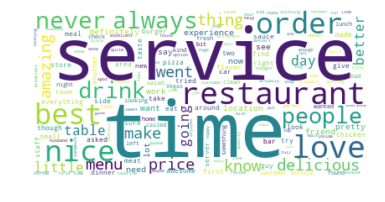

In [491]:
text1="".join(review for review in df.text)
wordcloud=WordCloud(stopwords=stopwords_1,background_color="white").generate(text=text1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

From the above wordcloud we can see that most common theme was Service, Timings, Table service, Drinks more than food,location and in the food section it was pizza and burger.

## Data Preprocessing

In [492]:
#remove html
def remove_html(text):
    soup= BeautifulSoup(text,'lxml')
    htmlfree= soup.gettext()
    return htmlfree

In [493]:
# remove punctuation
def remove_punctuation(text):
    no_punctuation= "".join([w for w in text if w not in string.punctuation])
    return no_punctuation

### Remove punctuation and convert to lower case

In [494]:
yelp_class['text']=yelp_class['text'].apply(lambda x: remove_punctuation(x).lower())

/Users/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [495]:
#yelp_class.text.apply(tokenize)
def remove_stopwords(text):
    text=tokenize(text)
    words= [x for x in text if x not in stopwords.words('english')]
    return words
remove_stopwords("i ador travi at the hard rock new kelli")

['ador', 'travi', 'hard', 'rock', 'new', 'kelli']

In [496]:
yelp_class.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,total bill for this horrible service over 8gs ...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,i adore travis at the hard rocks new kelly car...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,i have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,went in for a lunch steak sandwich was delicio...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,today was my second out of three sessions i ha...,2018-01-30 23:07:38,3509


#### Now we will perform tokenization for the purpose of stemming and lemmenting

tokenizer= RegexpTokenizer('\w+')st
yelp_class['text']=yelp_class['text'].apply(lambda x :tokenizer.tokenize(x))

In [527]:
def digit_replace(text):
    return re.sub("(\d)"," ",text)
print(digit_replace("59th th2i1s 290am is number 9"))


  th th i s    am is number  


In [528]:
digit_replace("49 subdb best sudbf")

'   subdb best sudbf'

In [529]:
# tokenizing using split
lemmatizer= WordNetLemmatizer()


In [530]:
porter= PorterStemmer()

In [531]:
def stemSentence(sentence):
    token_words=tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
    return " ".join(stem_sentence)

In [533]:
stemSentence("horrible service")
nltk.download('stopwords')

NameError: name 'token_words' is not defined

In [534]:
def lemmatize(sentence):
    token_words=tokenize(sentence)
    tokenized_words = []
    for word in token_words:
        tokenized_words.append(lemmatizer.lemmatize(word))
    return " ".join(tokenized_words)

nltk.download('punkt')

def remove_stopwords(text):
    word=word_tokenize(text)
    words= [x for x in word if x not in stopwords.words('english')]
    return words
remove_stopwords("this is an apple")

[nltk_data] Downloading package punkt to /Users/ankit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['apple']

In [535]:
yelp_class.text=yelp_class.text.apply(remove_stopwords)



TypeError: expected string or bytes-like object

In [515]:
yelp_class.text=yelp_class.text.apply(digit_replace)


TypeError: expected string or bytes-like object

In [522]:
yelp_class.text=yelp_class.text.apply(lemmatize)


NameError: name 'token_words' is not defined

In [523]:
yelp_class.text=yelp_class.text.apply(stemSentence)

NameError: name 'token_words' is not defined

In [507]:
type(yelp_class.text)

pandas.core.series.Series

In [508]:
yelp_class['text'].head()

0    total bill for this horrible service over 8gs ...
1    i adore travis at the hard rocks new kelly car...
2    i have to say that this office really has it t...
3    went in for a lunch steak sandwich was delicio...
4    today was my second out of three sessions i ha...
Name: text, dtype: object

In [509]:
yelp_class.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,total bill for this horrible service over 8gs ...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,i adore travis at the hard rocks new kelly car...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,i have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,went in for a lunch steak sandwich was delicio...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,today was my second out of three sessions i ha...,2018-01-30 23:07:38,3509


## CountVectorizer for text classification


In order to train our model we need to assign numbers to our words which are present in the reviews.Their are many ways to do this:

Bag of words: but that would be inefficient, all words have same importance, no semantic information is preserved.

Countervector: It can be used here as it counts the number of words used and the number of features depends on it. This converts our text features into numbers which helps in the model preparation.

Tfidf: Uncommon words are given more importance than the common words.

In [448]:

# Create a series to store the labels: y
y = yelp_class.stars

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(yelp_class["text"],y,test_size=0.33,random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['01', '02', '0219th', '02212015', '04', '0700', '08', '092714', '0945am', '10']


In [186]:
## We can transform our train set to an array to see how it looks.
a=count_train.toarray()

In [ ]:
a[0]

In [ ]:
X_train.iloc[0]

## TfidfVectorizer for text classification


As many of the common words like "are", "the" etc dominate our model hence we can use tfidf vectorizer which stands for Term frequency inverse document frequency.

Tfidf= Term Frequency* Inverse Document Frequency
where, term frequency= number of occurence of the word in the document/ number of words in the document
       inverse document frequency= log(no. of documents/no. of documents containing the words)

In [449]:

tf= TfidfVectorizer(stop_words="english",max_df=0.7)
tf_train=tf.fit_transform(X_train)
tf_test= tf.transform(X_test)

In [450]:

# Print the first 10 features
print(tf.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tf_train.A[:5])

['01', '02', '0219th', '02212015', '04', '0700', '08', '092714', '0945am', '10']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [451]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [452]:
tfidf_df = pd.DataFrame(tf_train.A, columns=tf.get_feature_names())

In [453]:
# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


   01  02  0219th  02212015  04  0700  08  092714  0945am  10  ...  フレンドリーで  \
0   0   0       0         0   0     0   0       0       0   0  ...        0   
1   0   0       0         0   0     0   0       0       0   0  ...        0   
2   0   0       0         0   0     0   0       0       0   0  ...        0   
3   0   0       0         0   0     0   0       0       0   0  ...        0   
4   0   0       0         0   0     0   0       0       0   1  ...        0   

   ボトルで無くても楽しめます  リゾット  全ての料理が美味しかった  店員さんがとにかく  日本人にとっても快適  気が利きます  牛肉のタルタル  \
0              0     0             0          0           0       0        0   
1              0     0             0          0           0       0        0   
2              0     0             0          0           0       0        0   
3              0     0             0          0           0       0        0   
4              0     0             0          0           0       0        0   

   盛り付けも丁寧で美味しい  聞いたことには丁寧に答えて下さいます  
0     

## Training and testing a classification model with scikit-learn


In [454]:

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred)
print(cm)


0.9358778625954198
[[ 422   84]
 [  42 1417]]


### TfidfVectorizer

In [455]:
nb_classifier.fit(tf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred)
print(cm)


0.7760814249363868
[[  66  440]
 [   0 1459]]


We see that the accuracy reduced as tfidf reduces the unwanted features which are not important for model building.

In [456]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  0.0
Score:  0.8585241730279898

Alpha:  0.1
Score:  0.9251908396946565

Alpha:  0.2
Score:  0.9073791348600508

Alpha:  0.30000000000000004
Score:  0.8834605597964377

Alpha:  0.4
Score:  0.8651399491094147

Alpha:  0.5
Score:  0.8483460559796437

Alpha:  0.6000000000000001
Score:  0.8305343511450382

Alpha:  0.7000000000000001
Score:  0.816793893129771

Alpha:  0.8
Score:  0.8045801526717558

Alpha:  0.9
Score:  0.7893129770992366



/Users/ankit/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


## We got the best accuracy at alpha=0.1

### N gram Vectorization

N grams are continous sequences of n-items in a sentence. N can be 1,2, or any positive number. Using this medthod the model can store more context.

In [195]:
#bigrams
cv_n = CountVectorizer(ngram_range=(1,2)) # (1,2) will use both 1 and 2 

In [196]:
# Transform the training data using only the 'text' column values: count_train 
bigram_train = cv_n.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
bigram_test = cv_n.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(cv_n.get_feature_names()[:10])

['01', '01 08', '01 good', '01 its', '02', '02 even', '02 its', '02 she', '0219th', '0219th at']


In [197]:
bigram_df = pd.DataFrame(bigram_train.A, columns=cv_n.get_feature_names())
print(bigram_df.head())

   01  01 08  01 good  01 its  02  02 even  02 its  02 she  0219th  0219th at  \
0   0      0        0       0   0        0       0       0       0          0   
1   0      0        0       0   0        0       0       0       0          0   
2   0      0        0       0   0        0       0       0       0          0   
3   0      0        0       0   0        0       0       0       0          0   
4   0      0        0       0   0        0       0       0       0          0   

   ...  日本人にとっても快適  日本人にとっても快適 お料理も味付け  気が利きます  気が利きます フレンドリーで  牛肉のタルタル  \
0  ...           0                   0       0               0        0   
1  ...           0                   0       0               0        0   
2  ...           0                   0       0               0        0   
3  ...           0                   0       0               0        0   
4  ...           0                   0       0               0        0   

   牛肉のタルタル リゾット  盛り付けも丁寧で美味しい  盛り付けも丁寧で美味しい オイスターやロブスター  聞いたこと

In [198]:
nb_classifier.fit(bigram_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(bigram_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred)
print(cm)


0.9251908396946565
[[ 367  139]
 [   8 1451]]


The accuracy using bigrams comes to 93%

### Word embedding

Word embedding is a language modelling technique used for mapping words to vectors . Like one food gets related to other food items.

It uses the idea of context, which means vectors of completely unrelated words should be far from other. 
Like, difference between vectors for male and female should be closer to difference between male employeeand female employee in a firm.

Word2vec(model made by google), 
Co-occurence matrix(decomposition of large marix into smaller ones- glove method(log of co-occurence matrix))

It preserves syntactical meaning of the text. 
Every word has a vector, we assign one hot vector initially where only one bit in a vector is 1. Then we take a window size and iterate hroughout our document. When we do this 2 words come into picture:
CBOW and Skipgram

In [ ]:
!pip install --upgrade gensim



In [199]:
import gensim
import gensim.models.word2vec as w2v


In [200]:

import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [201]:
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging

seed = 1
reviews2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)
reviews2vec.build_vocab(yelp_class['text'].apply(lambda x :tokenizer.tokenize(x)))
print("Word2Vec vocabulary length:", len(reviews2vec.wv.vocab))

Word2Vec vocabulary length: 6408


In [202]:
import sklearn.manifold


In [203]:
sentences=yelp_class['text'].apply(lambda x :tokenizer.tokenize(x))
#total_example=reviews2vec.wv.vocab
reviews2vec.train(sentences,epochs=10,total_examples=reviews2vec.corpus_count)

tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = reviews2vec.wv.syn0

all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

/Users/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


In [204]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[reviews2vec.wv.vocab[word].index])
            for word in reviews2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"])

In [205]:
points.head(10)


,word,x,y
0,total,-26.302122,-24.422993
1,bill,-50.700111,-8.140308
2,for,-24.279978,-21.211676
3,thi,5.232398,-5.341033
4,horribl,-3.415853,-13.690668
5,servic,1.973171,29.955378
6,over,-28.693535,-10.569721
7,these,-2.334032,8.367343
8,crook,-23.926537,1.121246
9,actual,-18.841124,5.529508
